In [52]:
import pandas as pd
import pickle

In [53]:
# read the dataframe from the pickle file
with open('norm_signals.pkl', 'rb') as f:
    norm_signals = pickle.load(f)

### Group by Phase

In [54]:
# Pivot the dataframe to participant and Round
grouped = norm_signals.groupby(['participant', 'Phase'])
grouped_df = grouped.apply(pd.DataFrame)
# grouped_df.shape

### Tranform dataset (create mean and sd columns)

In [55]:
import pandas as pd
import numpy as np


grouped_df.reset_index(drop=True, inplace=True)

# Create a dictionary to store the new data for each column
new_data = {}
gap = 5
# Iterate over each column of interest
for col in ['TEMP', 'HR', 'BVP', 'EDA']:
    # Create a list of lists to store the new data for this column
    col_data = []

    # Iterate over each row of the column
    for row in grouped_df[col]:
        # Create a new list to store the means and standard deviations for this row
        row_stats = []
        
        # Iterate over the 270 items of the list in steps of 15
        for i in range(0, 270, gap):
            # Calculate the mean and standard deviation of each 15-item segment
            segment = row[i:i+15]
            mean = np.mean(segment)
            std = np.std(segment)
            # Append the mean and standard deviation to the row_stats list
            row_stats.append(mean)
            row_stats.append(std)
        # Append the row_stats list to the col_data list
        col_data.append(row_stats)
    # Convert the col_data list of lists to a dataframe
    
    col_df = pd.DataFrame(col_data)

    # Create a list of new column names with means and standard deviations
    new_cols = []
    for i in range(-1, 269, gap):
        new_cols.append(f'{col}_mean_{i+1}')
        new_cols.append(f'{col}_std_{i+1}')
        
    # Rename the columns of the new dataframe
    col_df.columns = new_cols

    # Add the new dataframe to the new_data dictionary
    new_data[col] = col_df

grouped_df.reset_index(drop=True, inplace=True)
    
# Concatenate the original dataframe with the new dataframes
grouped_df = pd.concat([grouped_df] + [new_data[col] for col in new_data], axis=1)

grouped_df = pd.DataFrame(grouped_df)
grouped_df


,participant,Round,Phase,TEMP,HR,BVP,EDA,TEMP_mean_0,TEMP_std_0,TEMP_mean_5,...,EDA_mean_245,EDA_std_245,EDA_mean_250,EDA_std_250,EDA_mean_255,EDA_std_255,EDA_mean_260,EDA_std_260,EDA_mean_265,EDA_std_265
0,D1_0_id8,1,3,"[0.055084364469256526, 0.05501156592041685, 0....","[0.048796621433482214, 0.04889013381963885, 0....","[-0.05615389899495014, 0.033980655111392685, 0...","[0.0045714377245027055, 0.003795716255849008, ...",0.055038,0.000033,0.055035,...,0.003782,0.000049,0.003729,0.000050,0.003673,0.000043,0.003649,0.000029,0.003622,0.000012
1,D1_0_id8,1,2,"[0.054916478212452574, 0.0549232081209944, 0.0...","[0.0620037243074038, 0.061995503503953546, 0.0...","[-0.04262541347536578, 0.04058235504543537, 0....","[0.0026908513239030573, 0.002602776377538317, ...",0.054892,0.000033,0.054916,...,0.003393,0.000054,0.003291,0.000107,0.003240,0.000094,0.003187,0.000065,0.003228,0.000071
2,D1_0_id8,1,1,"[0.05518156177582724, 0.05518828151926176, 0.0...","[0.057113507739808965, 0.05690952267638537, 0....","[0.03593907714059743, 0.009429023483118542, 0....","[0.0018833207798228094, 0.0021500021423939506,...",0.055319,0.000103,0.055371,...,0.002646,0.000039,0.002673,0.000020,0.002685,0.000015,0.002689,0.000016,0.002695,0.000013
3,D1_0_id8,4,3,"[0.055084364469256526, 0.05509108793989706, 0....","[0.05199813012161984, 0.05183057640044591, 0.0...","[0.01394594636310843, 0.06891948807692919, -0....","[0.0024712529012441828, 0.002219908732403857, ...",0.055118,0.000020,0.055107,...,0.002132,0.000822,0.002677,0.000297,0.002693,0.000082,0.002649,0.000066,0.002591,0.000033
4,D1_0_id8,4,2,"[0.05410355528477024, 0.0541368237061346, 0.05...","[0.04960579395905546, 0.04964986539554115, 0.0...","[0.021257700314453534, 0.02943850983853435, -0...","[0.0026304706764478485, 0.0025782180909086263,...",0.054192,0.000043,0.054235,...,0.003878,0.000155,0.003760,0.000195,0.003565,0.000137,0.003489,0.000102,0.003398,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,D2_0_id3,3,2,"[0.06190584816676471, 0.06193881739513687, 0.0...","[0.05637469804254644, 0.056719589782409784, 0....","[0.008861836505245782, 0.00605044101676581, 0....","[0.015042255898301554, 0.0309728573556169, 0.0...",0.061934,0.000013,0.061929,...,0.009583,0.000890,0.008728,0.000389,0.008529,0.000446,0.008325,0.000416,0.008415,0.000521
290,D2_0_id3,3,1,"[0.061190122545653106, 0.061161268760219316, 0...","[0.044068239371002044, 0.04435284801911121, 0....","[0.06562041933136417, -0.03770924776739543, -0...","[0.02777879992251615, 0.03023604528221951, 0.0...",0.061148,0.000022,0.061125,...,0.046907,0.001256,0.045473,0.001159,0.043793,0.001919,0.042824,0.001616,0.041567,0.001260
291,D2_0_id3,2,3,"[0.0603153467865167, 0.06031303388576381, 0.06...","[0.05416530523358993, 0.054355980435158185, 0....","[-0.029420467845999658, -0.028305041632687294,...","[0.03419249574135134, 0.0338385980351946, 0.03...",0.060334,0.000019,0.060318,...,0.044357,0.001931,0.045445,0.001887,0.045243,0.001432,0.045106,0.001615,0.043611,0.000596
292,D2_0_id3,2,2,"[0.06057159423111221, 0.06058694306397339, 0.0...","[0.05142115492947196, 0.05136629599295005, 0.0...","[0.022254469311481683, -0.04918670089344533, 0...","[0.02711244452323424, 0.026238018847085782, 0....",0.060578,0.000015,0.060568,...,0.024912,0.002152,0.024555,0.001880,0.024930,0.001887,0.026207,0.000658,0.026769,0.000415


In [56]:
all_attri = grouped_df.columns.to_list()
for r_val in ["participant","Round", 'TEMP','HR','BVP','EDA']:
    all_attri.remove(r_val)


In [57]:
new_df = grouped_df[all_attri]
pca_attri = new_df.columns.to_list()
pca_attri.remove('Phase')

In [58]:
new_df.head(2)

,Phase,TEMP_mean_0,TEMP_std_0,TEMP_mean_5,TEMP_std_5,TEMP_mean_10,TEMP_std_10,TEMP_mean_15,TEMP_std_15,TEMP_mean_20,...,EDA_mean_245,EDA_std_245,EDA_mean_250,EDA_std_250,EDA_mean_255,EDA_std_255,EDA_mean_260,EDA_std_260,EDA_mean_265,EDA_std_265
0,3,0.055038,0.000033,0.055035,0.000031,0.055032,0.000027,0.055022,0.000016,0.054998,...,0.003782,0.000049,0.003729,0.000050,0.003673,0.000043,0.003649,0.000029,0.003622,0.000012
1,2,0.054892,0.000033,0.054916,0.000041,0.054938,0.000025,0.054943,0.000016,0.054935,...,0.003393,0.000054,0.003291,0.000107,0.003240,0.000094,0.003187,0.000065,0.003228,0.000071


In [59]:
new_df.shape

(294, 433)

### Plot

/Users/francis/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/francis/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


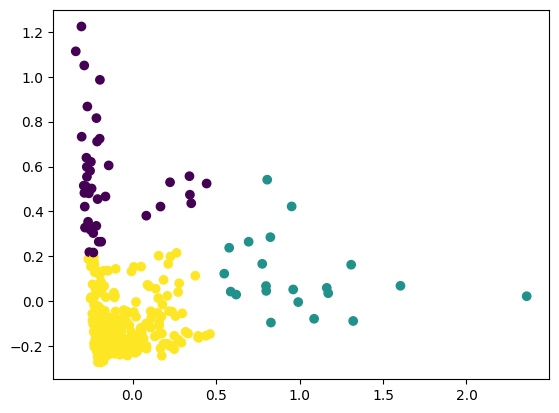

In [69]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X_tsne = TSNE(n_components=2,random_state=33).fit_transform(new_df[pca_attri])
X_pca = PCA(n_components=2,random_state=33).fit_transform(new_df[pca_attri])

tsne_label = new_df.Phase.to_list()


# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
# plt.title("LDA + KMeans clustering")
plt.show()

# plt.figure(figsize=(10, 5))
# plt.subplot(121)
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=tsne_label,label="t-SNE")
# plt.legend()
# plt.subplot(122)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tsne_label,label="PCA")
# plt.legend()
# # plt.savefig('images/digits_tsne-pca.png', dpi=120)
# plt.show()


### k-Means

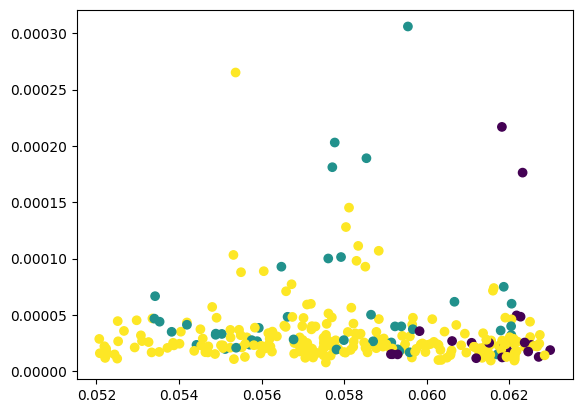

In [14]:
from sklearn.cluster import KMeans
np_new_df = new_df[pca_attri].to_numpy()
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(np_new_df)
plt.scatter(np_new_df[:, 0], np_new_df[:, 1], c=y_pred)
plt.show()

### DBSCAN

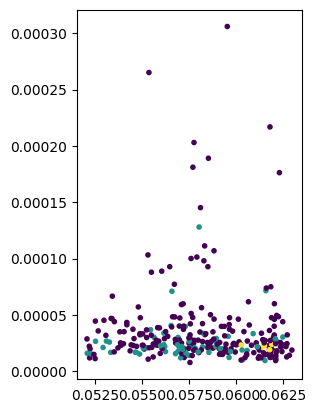

In [28]:
from sklearn.cluster import DBSCAN
np_new_df = new_df[pca_attri].to_numpy()
dbModel = DBSCAN(eps = 0.1, min_samples = 3).fit(np_new_df)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(np_new_df[:,0], np_new_df[:,1], c=dbModel.labels_, marker='.')
plt.show()

### OPTICS

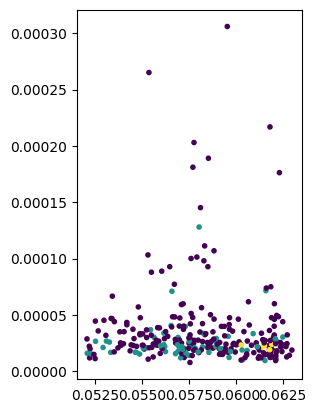

In [30]:
from sklearn.cluster import OPTICS
np_new_df = new_df[pca_attri].to_numpy()
clust = OPTICS(min_samples=50, xi=0.5, min_cluster_size=0.05).fit(np_new_df)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(np_new_df[:,0], np_new_df[:,1], c=dbModel.labels_, marker='.')
plt.show()

### EM

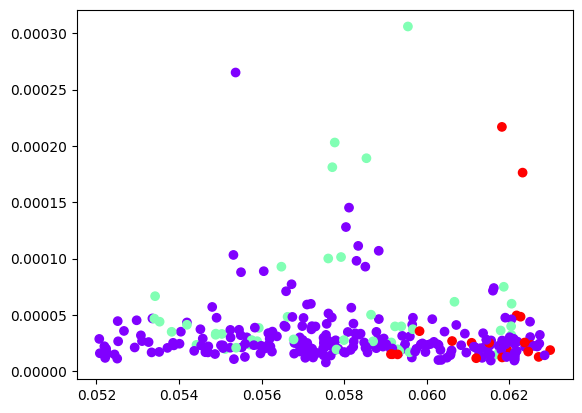

In [31]:
from sklearn.mixture import GaussianMixture
np_new_df = new_df[pca_attri].to_numpy()
gmm = GaussianMixture(n_components=3)
gmm.fit(np_new_df)
labels = gmm.predict(np_new_df)
plt.scatter(np_new_df[:,0], np_new_df[:,1], c=labels, cmap='rainbow')
plt.show()


### SVC

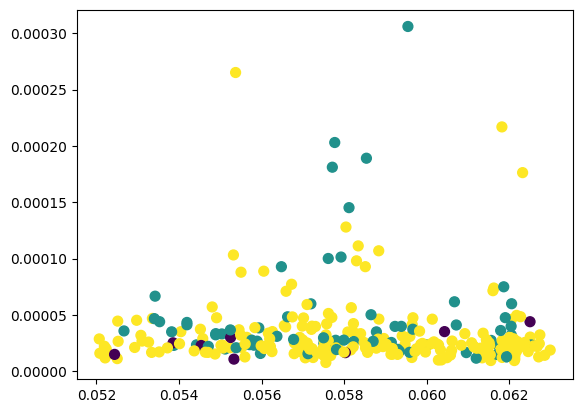

In [37]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# 生成数据集
np_new_df = new_df[pca_attri].to_numpy()
list_new_df= new_df.Phase.to_list()

# X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# 训练SVM模型
clf = SVC(C=1, kernel='linear')
clf.fit(np_new_df, list_new_df)

# 可视化聚类结果
plt.scatter(np_new_df[:, 0], np_new_df[:, 1], c=clf.predict(np_new_df), s=50, cmap='viridis')
plt.show()


### FastICA

/Users/francis/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


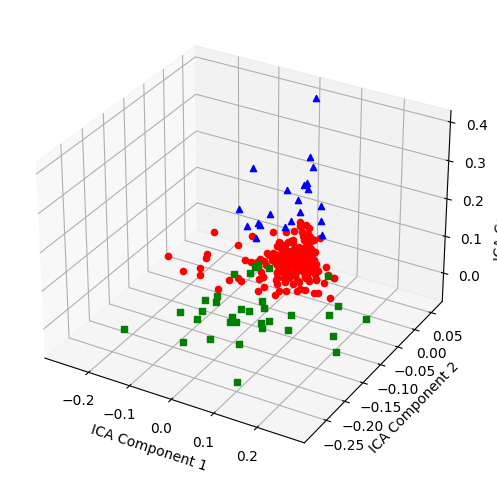

In [60]:
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据集
X = new_df[pca_attri].to_numpy()

# 使用FastICA算法提取独立成分
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(S_)

# 绘制聚类结果的三维散点图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X)):
    if labels[i] == 0:
        ax.scatter(S_[i, 0], S_[i, 1], S_[i, 2], c='red', marker='o')
    elif labels[i] == 1:
        ax.scatter(S_[i, 0], S_[i, 1], S_[i, 2], c='blue', marker='^')
    elif labels[i] == 2:
        ax.scatter(S_[i, 0], S_[i, 1], S_[i, 2], c='green', marker='s')

ax.set_xlabel('ICA Component 1')
ax.set_ylabel('ICA Component 2')
ax.set_zlabel('ICA Component 3')
plt.show()


/Users/francis/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


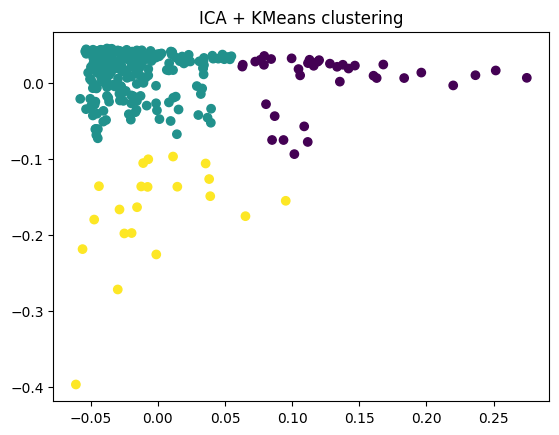

In [73]:
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据集
X = new_df[pca_attri].to_numpy()

# 使用FastICA算法提取独立成分
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(S_)

plt.scatter(S_[:, 0], S_[:, 1], c=labels)
plt.title("ICA + KMeans clustering")
plt.savefig("./ica.png")
plt.show()

# # 绘制聚类结果的三维散点图
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# for i in range(len(X)):
#     if labels[i] == 0:
#         ax.scatter(S_[i, 0], S_[i, 1], S_[i, 2], c='red', marker='o')
#     elif labels[i] == 1:
#         ax.scatter(S_[i, 0], S_[i, 1], S_[i, 2], c='blue', marker='^')
#     elif labels[i] == 2:
#         ax.scatter(S_[i, 0], S_[i, 1], S_[i, 2], c='green', marker='s')

# ax.set_xlabel('ICA Component 1')
# ax.set_ylabel('ICA Component 2')
# ax.set_zlabel('ICA Component 3')
# plt.show()


/Users/francis/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


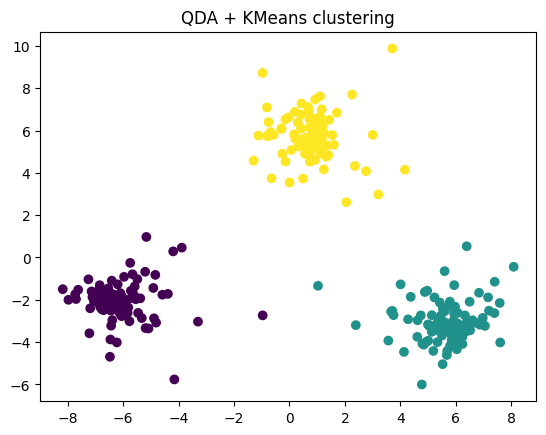

In [74]:
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 生成样本数据
# X, y = make_blobs(n_samples=1000, centers=3, random_state=42)
X = new_df[pca_attri].to_numpy()
y = new_df.Phase.to_numpy()
# 使用LDA进行降维
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(X, y)
X_qda = qda.predict(X)

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_lda)

# 可视化聚类结果
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_pred)
plt.title("QDA + KMeans clustering")
plt.savefig("./qda.png")
plt.show()
